<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/PSO/notebooks/solutions/PSO_cv01_en_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. lab** - Google Colab, NumPy and OpenCV basics

In this notebook we will cover the basics of working in the Google Colab environment, NumPy and basic image manipulation in OpenCV.

## Google Colab

Google Colab (http://colab.research.google.com) is a free service which allows the users to run ipython notebooks in the cloud. The service also allows the users to leverage a free GPU. A Google account is necessary to use this service. The notebooks can also be downloaded and run locally using the jupyter notebook in the directory where the notebooks are saved (provided you have jupyter installed).

There are two types of cells in these notbooks. The first type is a text cell such as this one. The other type of a cell is code cell. The cells with code can be run with the play button to the left of the cell. All of the cells can also be run by clicking choosing Runtime -> Run All in the menu at the top of this page. The cells share a scope so it is necessary to be mindful of the order in which the cells run. If you need to restart the notebook you can look into the Runtime tab in the options on top of the page.

You can try running a simple python code in the following cell.

In [ ]:
a = [5,'Hello']
s = '{} World!'
print(s.format(a[1]))

def najlepsia_funkcia(arg):
  return arg + 5

print(najlepsia_funkcia(8))

Hello World!
13


Saving and using files that are stored permanently can be done in different ways, but the easiest option is to connecting Google Drive to our notebook instance. This is done in a following way:
(Note: this assumes that you have created a directory named Colab in your Google Drive)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/Colab/'

Mounted at /content/gdrive


You can then access the folder (if it exists).

In [ ]:
import os
os.listdir(root_path)

['mnist-fc-trained.h5', 'cifar-fc-trained.h5']

You can also use the standard unix commands by preceeding them with an exclamation point.

In [ ]:
!pwd
!ls
!mkdir random_dir
!ls
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/plant.jpg
!ls

/content
gdrive	sample_data
gdrive	random_dir  sample_data
--2024-08-19 22:14:54--  https://www.google.com/images/branding/googlelogo/1x/googlelogo_color_272x92dp.png
Resolving www.google.com (www.google.com)... 74.125.195.103, 74.125.195.147, 74.125.195.104, ...
Connecting to www.google.com (www.google.com)|74.125.195.103|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5969 (5.8K) [image/png]
Saving to: ‘googlelogo_color_272x92dp.png’

googlelogo_color_27 100%[===================>]   5.83K  --.-KB/s    in 0s      

2024-08-19 22:14:54 (66.6 MB/s) - ‘googlelogo_color_272x92dp.png’ saved [5969/5969]

gdrive	googlelogo_color_272x92dp.png  random_dir  sample_data


This is not always necessary as you can access the instance file structure in the panel on the left.

**<----**

# NumPy

NumPy is a very useful library that enables us to work efficiently with multidimensional arrays in python. Multidimensional arrays are useful in many computer science applications. In this chapter we will cover the basics of using NumPy.

The documentation for numpy can be found here: [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/).



## NumPy arrays
An array is a base data structure we will use when dealing with image data. The mathematical equivalent to arrays are tensors.

A simple one-dimensional array with $n$ elements can be used to store vectors from $\mathbb{R}^n$. A two-dimensional array can be used to store matrices from $\mathbb{R}^{m \times n}$. We can also use arrays with more dimensions to represent so-called tensors of higher orders.

Tensor is a generalization of vectors and matrices. Vectors from  are first order tensors and matrices are second order tensors. A third order tensor can be additionally indexed with one more index. Sometimes the order of tensor is also called its rank.

*Note on terminology:* The word dimension has a different meaning when referring to arrays as compared to the underlying mathematical spaces. Vectors from $\mathbb{R}^n$ have a dimension of $n$, but the corresponding array is often described as one-dimensional. The array dimension thus reflects the number of indices we can use to access data in the array. In this sense the dimension of the array is equivalent to the order of the tensor it represents and not to its dimension. An alternative way is to use the term axis per one array dimension. In this way a vector has one axis and a matrix has two.

To conform to standards we `import numpy as np`. A one-dimensional array (e.g. vector/first order tensor) can be created from a simple list using the np.array constructor. It might be important to initialize the array with a specific data type which can be done by using the dtype keyword in the constructor.

In [ ]:
import numpy as np

a = np.array([3, 2, 3, 4])
print(a)
b = np.array([1,5,7], dtype=np.float32)
print(b)

[3 2 3 4]
[1. 5. 7.]


A matrix can be created from a list of lists, but it is necessary for the lengths of the inner lists to be consitent. If they are not consistent an error will be thrown. In older NumPy versions we may obtain a vector of lists instead of matrix of values.

In [ ]:
A = np.array([[1,5,8],[50,60,84]])
print("A:")
print(A)
B = np.array([[7,8],[6,7],[0,9,4]])
print("B:")
print(B)

A:
[[ 1  5  8]
 [50 60 84]]


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

The array object has a `shape` method which tells us its shape (size of arrays for the invidual dimensions) and method dtype which returns the data type of the values in the array. It also has a method `astype` which returns an array with the specified type.

In [ ]:
print("a.shape: ", a.shape)
print("A.shape: ", A.shape)
print("a.dtype: ", A.dtype)
C = A.astype(np.float32)
print("C.dtype: ", C.dtype)

a.shape:  (4,)
A.shape:  (2, 3)
a.dtype:  int64
C.dtype:  float32


NumPy has a few functions to generate basic arrays. The most commnly used onse are: `np.zeros`, `np.ones` and `np.empty`.

In [ ]:
z = np.zeros([5,10])
print("Zeros:")
print(z)
o = np.ones([3,4,5])
print("Ones:")
print(o)
e = np.empty([6])
print("Empty:")
print(e)

Zeros:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Ones:
[[[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]

 [[1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]
  [1. 1. 1. 1. 1.]]]
Empty:
[4.94e-324 2.47e-323 3.95e-323 2.47e-322 2.96e-322 4.15e-322]


It is also possible the create arrays with random numbers by using `np.random.random`.

In [ ]:
r = np.random.random([6,10,3])
print(r)

[[[0.90643136 0.19408406 0.67810868]
  [0.50186537 0.04653358 0.22585116]
  [0.36880157 0.49327365 0.40632244]
  [0.47770404 0.24885517 0.87170424]
  [0.25970957 0.17456435 0.48518842]
  [0.16915977 0.52139887 0.59886963]
  [0.43431785 0.52555265 0.2428777 ]
  [0.16037931 0.3358694  0.78609808]
  [0.27048309 0.73490792 0.92696232]
  [0.64186297 0.33679528 0.39005809]]

 [[0.59058181 0.20932516 0.13101907]
  [0.79982681 0.65848456 0.61856331]
  [0.99031233 0.50562599 0.39380365]
  [0.04404701 0.96729752 0.69528632]
  [0.27876293 0.53011075 0.09566515]
  [0.07345372 0.85329469 0.57654479]
  [0.90161969 0.19180674 0.9790848 ]
  [0.31406271 0.30520938 0.82157565]
  [0.91154464 0.46582203 0.01896792]
  [0.12464385 0.47430015 0.44427778]]

 [[0.17845814 0.13525371 0.41089293]
  [0.71344032 0.65567514 0.87003374]
  [0.68235088 0.92253514 0.55008168]
  [0.90851332 0.94294988 0.61161078]
  [0.44512848 0.15103692 0.96676207]
  [0.42248962 0.43321048 0.2781914 ]
  [0.0717828  0.79222069 0.1233106

We can now use these random arrays to work with indices. Indexing is similar to Matlab, but the python conventions are applied. We can use multiple indices (based on array dimension/tensor order). If we omit one of the indices it is implicitly used as `:`, which means that all of the elements along that dimesnsions are used.

In [ ]:
print("r[3,4,1]:")
print(r[3,4,1])
print("\nr[:,:,-1]:")
print(r[:,:,-1])
print("\nr[:,:,1].shape:")
print(r[:,:,1].shape)
print("\nr[0:4,5:6,:]:")
print(r[0:4,5:6,:])
print("\nr[0:4,5:6,:].shape:")
print(r[0:4,5:6,:].shape)

r[3,4,1]:
0.5732530302788172

r[:,:,-1]:
[[0.67810868 0.22585116 0.40632244 0.87170424 0.48518842 0.59886963
  0.2428777  0.78609808 0.92696232 0.39005809]
 [0.13101907 0.61856331 0.39380365 0.69528632 0.09566515 0.57654479
  0.9790848  0.82157565 0.01896792 0.44427778]
 [0.41089293 0.87003374 0.55008168 0.61161078 0.96676207 0.2781914
  0.12331069 0.75202344 0.80942124 0.14507252]
 [0.48513259 0.2566951  0.71882293 0.55633572 0.77566185 0.13909969
  0.10199149 0.34286297 0.09846393 0.02850228]
 [0.97432593 0.48468449 0.56599455 0.45894042 0.84144768 0.34362754
  0.35175744 0.61602095 0.8532502  0.5378128 ]
 [0.50706927 0.93301783 0.77957408 0.26980347 0.83544918 0.09599565
  0.39713258 0.5558699  0.34233963 0.4060676 ]]

r[:,:,1].shape:
(6, 10)

r[0:4,5:6,:]:
[[[0.16915977 0.52139887 0.59886963]]

 [[0.07345372 0.85329469 0.57654479]]

 [[0.42248962 0.43321048 0.2781914 ]]

 [[0.7292252  0.98644067 0.13909969]]]

r[0:4,5:6,:].shape:
(4, 1, 3)


We can also use steps when indexing this is also called slicing. That can be done by another colon. The format is then `[start:stop:step]`. If any of that is left empty the start is implicitly assumed to be 0, the end -1 and step 1.

In [ ]:
p = np.arange(25)
print("p: ", p)
print("p[4:16:2]: ", p[4:16:2])
print("p[2:-4:6]: ", p[2:-4:6])
print("p[:10:]: ", p[:10:])
print("p[::3]: ", p[::3])
print("p[1::6]: ", p[1::6])
print("p[-6:]: ", p[-6:])
print("\nr[1::2,0::3,:]:\n", r[1::2,0::3,:])

p:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
p[4:16:2]:  [ 4  6  8 10 12 14]
p[2:-4:6]:  [ 2  8 14 20]
p[:10:]:  [0 1 2 3 4 5 6 7 8 9]
p[::3]:  [ 0  3  6  9 12 15 18 21 24]
p[1::6]:  [ 1  7 13 19]
p[-6:]:  [19 20 21 22 23 24]

r[1::2,0::3,:]:
 [[[0.59058181 0.20932516 0.13101907]
  [0.04404701 0.96729752 0.69528632]
  [0.90161969 0.19180674 0.9790848 ]
  [0.12464385 0.47430015 0.44427778]]

 [[0.01826166 0.35541322 0.48513259]
  [0.69931138 0.97452913 0.55633572]
  [0.41997558 0.20561703 0.10199149]
  [0.43850019 0.6500962  0.02850228]]

 [[0.36205922 0.4138772  0.50706927]
  [0.07558025 0.68357785 0.26980347]
  [0.92977173 0.59156014 0.39713258]
  [0.67632979 0.74921021 0.4060676 ]]]


We will often need to create a so-called singleton dimension. This cane be done by adding a None index, or in a more readable way by using `np.newaxis`.

In [ ]:
print("Original shape:                ", r.shape)
print("Shape with [None,:,:,:]:       ", r[None,:,:,:].shape)
print("Shape with [None]:             ", r[None].shape)
print("Shape with [np.newaxis,:,:,:]: ", r[np.newaxis,:,:,:].shape)
print("Shape with [:,:,:,np.newaxis]: ", r[:,:,:,np.newaxis].shape)
print("Shape with [np.newaxis,:,0,:]: ", r[np.newaxis,:,0,:].shape)

Original shape:                 (6, 10, 3)
Shape with [None,:,:,:]:        (1, 6, 10, 3)
Shape with [None]:              (1, 6, 10, 3)
Shape with [np.newaxis,:,:,:]:  (1, 6, 10, 3)
Shape with [:,:,:,np.newaxis]:  (6, 10, 3, 1)
Shape with [np.newaxis,:,0,:]:  (1, 6, 3)


TODO: Broadcasting is done implicitly.

In [ ]:
r += 10
print(r)
r[0,:,:] = np.random.random([10,3])
print(r.shape)
r[0] = np.random.random([10,3])
print(r.shape)
r[0] = np.zeros([10,1])
print(r.shape)
r/=500
print(r)

[[[10.27120263 10.12235296 10.27768495]
  [10.43381134 10.76829321 10.77380813]
  [10.61400328 10.03708203 10.29487577]
  [10.29404602 10.49936474 10.88522662]
  [10.56078056 10.0569032  10.14535549]
  [10.0160632  10.30927429 10.14763605]
  [10.52206685 10.52712984 10.39666191]
  [10.96040884 10.73812744 10.87811828]
  [10.65597534 10.11331029 10.55485111]
  [10.23537491 10.04871722 10.11882378]]

 [[10.11718312 10.48713921 10.66769211]
  [10.29695589 10.8061901  10.56133462]
  [10.77497544 10.80211749 10.64787834]
  [10.19476831 10.17314071 10.11826585]
  [10.48529163 10.53734223 10.20062211]
  [10.68891761 10.40780246 10.36150487]
  [10.00884296 10.96965892 10.16260031]
  [10.87235914 10.02638604 10.11859773]
  [10.11439105 10.1359931  10.5136458 ]
  [10.76413177 10.43007858 10.82880598]]

 [[10.85090845 10.11415805 10.17081582]
  [10.39853773 10.70232758 10.72769041]
  [10.65115888 10.91285644 10.28853678]
  [10.77620163 10.42900555 10.92503075]
  [10.98325153 10.43045534 10.600170

An array can be reshaped using `np.reshape` or its `reshape` method.

In [ ]:
print("Original shape:  ", r.shape)
q = np.reshape(r, [6,30])
print("After reshaping: ", q.shape)

Original shape:   (6, 10, 3)
After reshaping:  (6, 30)


Arrays can be joined. One way is to use `np.concatenate([arr1, arr2, ...], axis = i)` which connects the arrays `arr1` and `arr2` through a given axis (array dimension) `i`. Note that is usually better (for code comprehension) to explicitly use the keyword `axis` even if it is redundant.

In [ ]:
a = np.ones([3,4])
b = np.zeros([6,4])
c = np.concatenate([a,b], axis = 0)
print(c)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


A different option is to use `np.stack([arr1, arr2, ...], axis= i)`. The difference is that this creates a new axis in the resulting array (increases the tensor order by one).

In [ ]:
a = np.ones([6,4,3])
b = np.zeros([6,4,3])
d = np.stack([a,b], axis = 0)
print(d.shape)
f = np.stack([a,b], axis = -1)
print(f.shape)
g = np.stack([a,b], axis = 1)
print(g.shape)

(2, 6, 4, 3)
(6, 4, 3, 2)
(6, 2, 4, 3)


We can also index using conditions.

In [ ]:
r = np.random.random([5,5])
print("Original array:")
print(r)
print("\nModified array:")
r[r < 0.5] = -500
print(r)

Original array:
[[0.21283451 0.6497741  0.72463875 0.09913284 0.61027938]
 [0.73647166 0.6118287  0.0174922  0.34368178 0.74180187]
 [0.07093276 0.28479831 0.83747083 0.96723287 0.19579437]
 [0.77874835 0.52420559 0.04866723 0.10755683 0.99569133]
 [0.39868306 0.02211147 0.93244793 0.19861694 0.24595629]]

Modified array:
[[-500.            0.6497741     0.72463875 -500.            0.61027938]
 [   0.73647166    0.6118287  -500.         -500.            0.74180187]
 [-500.         -500.            0.83747083    0.96723287 -500.        ]
 [   0.77874835    0.52420559 -500.         -500.            0.99569133]
 [-500.         -500.            0.93244793 -500.         -500.        ]]


The conditions can also be using in `np.where(cond, a1, a2)`, which returns an array which contans elemnts from `a1` where the condition is true and elements from `a2` where the condition is false. We can also use `np.arange(i)` which is equivalent to `range(i)` from Python.

In [ ]:
a = np.arange(10)
print("np.arange(10): ", a)
b = np.where(a < 5, a, a**2)
print("np.where(a < 5, a, a**2): ", b)

np.arange(10):  [0 1 2 3 4 5 6 7 8 9]
np.where(a < 5, a, a**2):  [ 0  1  2  3  4 25 36 49 64 81]


### Exercise 1 - Chessboard
Create a funciton `chessboard(rows, cols)` which returns a two-dimensional numpy array with shape `(rows, cols)`. The array will contain 1 in spots where a chessboard tile would be white and 0 where a chessboard tile would be black.

The simplest way to solve this exercise is to use slicing. If you feel adventurous you can check the NumPy documentation and use conditions with `np.mgrid` or repetition and `np.tile`.

In [ ]:
def chessboard(rows, cols):
  c = np.zeros([rows, cols])
  c[::2, 1::2] = 1
  c[1::2, ::2] = 1
  return c

In [ ]:
# this code should print your correct checkerboard
print(chessboard(8,8))
print(chessboard(5,12))

[[0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0.]]
[[0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1.]]


### Exercise 2 - Indexing

Generate a $10 \times 5$ random matrix from a uniform distribution. Subsequently, change all elements greater than 0.8 to 1. Then, change all elements less than 0.3 to half the value on the same row, but in the next column to the left. If there are such values in the first column, change them to 0. Do the operation as if you were making all the changes at once. However, it does not have to be a single operation in the code. You will need logical indexing and in the second case also the `np.where` command. Do not use a `for` loop.

In [ ]:
r = np.random.rand(10, 5)
print("\Random array: ")
print(r)

r[0.8 < r] = 1.0
print("\nChange values below 0.8: ")
print(r)

r[:, 1:] = np.where(r[:, 1:] < 0.3, r[:, 0:4] / 2, r[:, 1:])
r[r[:, 0] < 0.3, 0] = 0.0
print("\nFinal step: ")
print(r)

\Random array: 
[[0.54596501 0.93136333 0.30377446 0.78604008 0.73065488]
 [0.76262224 0.93841773 0.44792574 0.9790341  0.33662861]
 [0.45035706 0.08741689 0.36470037 0.46350262 0.7364501 ]
 [0.28711656 0.46232922 0.78857844 0.0128561  0.59414239]
 [0.19018373 0.98400672 0.43509899 0.81195368 0.66477488]
 [0.8617532  0.52728051 0.49901424 0.75280039 0.7544472 ]
 [0.00221265 0.99151344 0.38463195 0.99153466 0.49927175]
 [0.41918137 0.52892503 0.02343334 0.14913033 0.59532655]
 [0.73864046 0.53382914 0.5169041  0.62925964 0.86810323]
 [0.66128954 0.13146925 0.26862379 0.56246592 0.70356594]]

Change values below 0.8: 
[[0.54596501 1.         0.30377446 0.78604008 0.73065488]
 [0.76262224 1.         0.44792574 1.         0.33662861]
 [0.45035706 0.08741689 0.36470037 0.46350262 0.7364501 ]
 [0.28711656 0.46232922 0.78857844 0.0128561  0.59414239]
 [0.19018373 1.         0.43509899 1.         0.66477488]
 [1.         0.52728051 0.49901424 0.75280039 0.7544472 ]
 [0.00221265 1.         0.38

## Mathematical Operations

We can also apply mathematical operations on arrrays.

In [ ]:
r = np.random.rand(2, 6)
print("Original array:")
print(r)
print("\nsin:")
print(np.sin(r))
print("\ncos:")
print(np.cos(r))
print("\narccos:")
print(np.arccos(r))
print("\nexp:")
print(np.exp(r))
print("\n**2:")
print(r ** 2)

Original array:
[[0.99994384 0.08076563 0.79778361 0.64815684 0.1271312  0.52270181]
 [0.58598212 0.35866578 0.28067154 0.62038599 0.8418954  0.52884485]]

sin:
[[0.84144064 0.08067785 0.71581016 0.60371807 0.12678902 0.499223  ]
 [0.55301792 0.35102523 0.27700097 0.58134927 0.74590689 0.50453633]]

cos:
[[0.54034957 0.99674023 0.69829494 0.7971979  0.99192971 0.86647354]
 [0.83316936 0.936366   0.96086964 0.81365412 0.66605023 0.86339046]]

arccos:
[[0.0105985  1.48994263 0.64718605 0.8656348  1.44332015 1.02077923]
 [0.94470479 1.20395814 1.28630262 0.90156157 0.57001033 1.01355739]]

exp:
[[2.71812916 1.08411678 2.22061373 1.91201343 1.135566   1.68657831]
 [1.79675476 1.43141832 1.32401865 1.85964571 2.32076158 1.69697092]]

**2:
[[0.99988768 0.00652309 0.63645869 0.42010729 0.01616234 0.27321718]
 [0.34337505 0.12864114 0.07877651 0.38487878 0.70878786 0.27967687]]


## Summary operations
Various operations can also be performed on NumPy arrays. For example, it is possible to sum an array using the `np.sum` function. The functions `np.min` (mininum), `np.max` (maximum), `np.mean` (average), `np.median` (median), `np.var` (variation) and `np.std` (standard deviation) work similarly.



In [ ]:
a = np.random.rand(4, 3)
print("Original array:")
print(a)

print("\nMean:")
print(np.mean(a))

print("\nMedian:")
print(np.median(a))

print("\nSum:")
print(np.sum(a))

print("\nMax:")
print(np.max(a))

print("\nStandard Deviation:")
print(np.std(a))

Original array:
[[3.08888524e-01 9.56834350e-01 6.05005441e-01]
 [4.84898269e-01 8.17415581e-01 9.12641595e-01]
 [3.30402221e-01 1.34308438e-01 5.87402177e-01]
 [9.60077211e-01 3.68271584e-04 4.53598262e-01]]

Mean:
0.5459866951260114

Median:
0.5361502232255849

Sum:
6.551840341512136

Max:
0.9600772113862835

Standard Deviation:
0.3076405828758623


## Keyword axis

We often want an operation to be performed only along a single dimension (e.g. sum all elements in each row). In that case, it is appropriate to use the `axis` keyword. This will allow us to sum along a specific dimension. It is also possible to use tuples to perform the operation along multiple dimensions at the same time. Many numpy methods have this keyword available.


In [ ]:
a = np.random.rand(4, 3)
b = np.random.rand(4, 3, 16, 16)

print("Original array (a):")
print(a)

print("\nSum along axis 0:")
print(np.sum(a, axis=0))

print("Shape after summing along axis 0: ", np.sum(a, axis=0).shape)

print("\nSum along axis 1:")
print(np.sum(a, axis=1))

print("Shape after summing along axis 1: ", np.sum(a, axis=1).shape)
print()


print("Shape of b: ", b.shape)
print("Shape of b after summing along axes (1, 2, 3): ", np.sum(b, axis=(1, 2, 3)).shape)

Original array (a):
[[0.80831599 0.46023146 0.60351549]
 [0.02010813 0.26176632 0.41037975]
 [0.58330661 0.52218346 0.32914569]
 [0.04003753 0.14468466 0.36465406]]

Sum along axis 0:
[1.45176826 1.38886591 1.707695  ]
Shape after summing along axis 0:  (3,)

Sum along axis 1:
[1.87206295 0.6922542  1.43463576 0.54937626]
Shape after summing along axis 1:  (4,)

Shape of b:  (4, 3, 16, 16)
Shape of b after summing along axes (1, 2, 3):  (4,)


For minimum and maximum, there are two more functions (`np.minimum `and `np.maximum`) that compare two arrays.

In [ ]:
b = ((np.arange(12) - 7) * 2).reshape(4,3)

print("a: ")
print(a)
print("\nb: ")
print(b)
print("\nnp.maximum(a, b)")
print(np.maximum(a, b))

a: 
[[0.80831599 0.46023146 0.60351549]
 [0.02010813 0.26176632 0.41037975]
 [0.58330661 0.52218346 0.32914569]
 [0.04003753 0.14468466 0.36465406]]

b: 
[[-14 -12 -10]
 [ -8  -6  -4]
 [ -2   0   2]
 [  4   6   8]]

np.maximum(a, b)
[[0.80831599 0.46023146 0.60351549]
 [0.02010813 0.26176632 0.41037975]
 [0.58330661 0.52218346 2.        ]
 [4.         6.         8.        ]]


### Exercise 3 - Euclidean metric

Implement the function `euclidian_distance_single(x, y)`, which takes two arrays representing vectors x and y as input, both from $\mathbb{R}^n$, and calculates:

$$\rho_e(\vec{x}, \vec{y}) = \sqrt{\sum_{i=1}^{n} \left(x_i - y_i\right)^2}$$

In [ ]:
def euclidian_distance_single(x, y):
  return np.sqrt(np.sum((x - y) ** 2))

You can test your implementation by comparing the output to the output of `np.linalg.norm` which does the same.

In [ ]:
for i in range(10):
  n = np.random.randint(100)
  a = np.random.rand(n)
  b = np.random.rand(n)

  d = euclidian_distance_single(a, b)
  d_gt = np.linalg.norm(a - b)
  if np.abs(d_gt - d) < 1e-8:
    print("Pass!")
  else:
    print("Fail")

Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!


### Exercise 4 - Euclidean vectorized

Now create a new euclidian distance function that will work by letting x represent a vector from $\mathbb{R}^n$ and y represent an $m \times n$ matrix, each row of which is a vector from $\mathbb{R}^n$ . The function then returns a vector of length $m$, which will contain the metrics between x and the individual vectors of y.

In [ ]:
def euclidian_distance(x, y):
  return np.sqrt(np.sum((x[np.newaxis, :] - y) ** 2, axis=-1))

You can test the code.

In [ ]:
for i in range(10):
  n = np.random.randint(100)
  a = np.random.rand(n)
  b = np.random.rand(30, n)

  d = euclidian_distance(a, b)

  for i in [4,9,13,24]:
    if np.abs(np.linalg.norm(a - b[i]) - d[i]) < 1e-8:
      print("Pass!")
    else:
      print("Fail!")

Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!
Pass!


## Multiplication

We can also multiply arrays. We can use either the `*` operator, which performs element-by-element multiplication, or the `@` operator, which performs matrix multiplication. In the case of `@`, the vector is always considered to be column or row based, as appropriate. It is also possible to use `np.dot` for multiplication. We can also transpose matrices using the `.T` method

In [ ]:
x = np.array([1, 2, 3])
y = np.array([8, 0, 7])

A = np.arange(9).reshape(3, 3)
B = np.random.rand(4, 3)
C = np.random.rand(3, 3)

# Print the arrays
print("Vector x:")
print(x)

print("\nVector y:")
print(y)

print("\nMatrix A:")
print(A)

print("\nMatrix B:")
print(B)

print("\nMatrix C:")
print(C)

print("\n" + 20 * '*' + "\n")

# Element-wise and dot product of vectors
print("Dot product (x @ y):")
print(x @ y)

print("\nElement-wise multiplication (x * y):")
print(x * y)

print("\n" + 20 * '*' + "\n")

# Matrix-vector multiplication
print("Matrix-vector product (A @ x):")
print(A @ x)

print("\nMatrix-vector product (y @ A):")
print(y @ A)

print("\nMatrix-vector product (x @ C):")
print(x @ C)

print("\nCombined matrix product (x @ A @ y):")
print(x @ A @ y)

print("\n" + 20 * '*' + "\n")

# Matrix-matrix element-wise multiplication and matrix multiplication
print("Element-wise multiplication (A * C):")
print(A * C)

print("\nMatrix product (A @ C):")
print(A @ C)

print("\nMatrix product (B @ A):")
print(B @ A)

print("\n" + 20 * '*' + "\n")

# Broadcasting with element-wise multiplication
print("Element-wise multiplication with broadcasting (A * x):")
print(A * x)

print("\n" + 20 * '*' + "\n")

# Examples of operations that do not work
print("Attempting invalid operations:")
try:
    print("\nx @ B:")
    print(x @ B)
except ValueError as e:
    print("Error:", e)

try:
    print("\nA @ B:")
    print(A @ B)
except ValueError as e:
    print("Error:", e)

Vector x:
[1 2 3]

Vector y:
[8 0 7]

Matrix A:
[[0 1 2]
 [3 4 5]
 [6 7 8]]

Matrix B:
[[0.06523499 0.61025682 0.43217722]
 [0.44856261 0.99207627 0.73029684]
 [0.26265178 0.5153847  0.77403465]
 [0.87128515 0.18587419 0.48727314]]

Matrix C:
[[0.17195683 0.87166693 0.5360192 ]
 [0.28142291 0.91554275 0.62237944]
 [0.32265627 0.21244858 0.41287626]]

********************

Dot product (x @ y):
29

Element-wise multiplication (x * y):
[ 8  0 21]

********************

Matrix-vector product (A @ x):
[ 8 26 44]

Matrix-vector product (y @ A):
[42 57 72]

Matrix-vector product (x @ C):
[1.70277148 3.34009818 3.01940688]

Combined matrix product (x @ A @ y):
444

********************

Element-wise multiplication (A * C):
[[0.         0.87166693 1.0720384 ]
 [0.84426874 3.662171   3.11189721]
 [1.93593764 1.48714007 3.30301012]]

Matrix product (A @ C):
[[ 0.92673546  1.34043991  1.44813197]
 [ 3.25484351  7.33941471  6.16195668]
 [ 5.58295155 13.3383895  10.8757814 ]]

Matrix product (B @ A)

## Plots

We can also create plots. We will use the [Matplotlib](https://matplotlib.org) library. For nicer plots you can check out [Seaborn](https://seaborn.pydata.org).

**Lineplots**

The simplest plot is a lineplot. The following code simply prints a the cosine function.

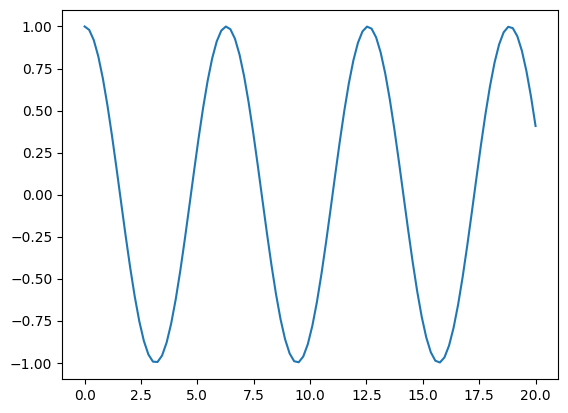

In [ ]:
from matplotlib import pyplot as plt

x = np.linspace(0, 20, 100)
y = np.cos(x)

plt.plot(x, y)
plt.show()

We can plot multiple lines into the same canvas.

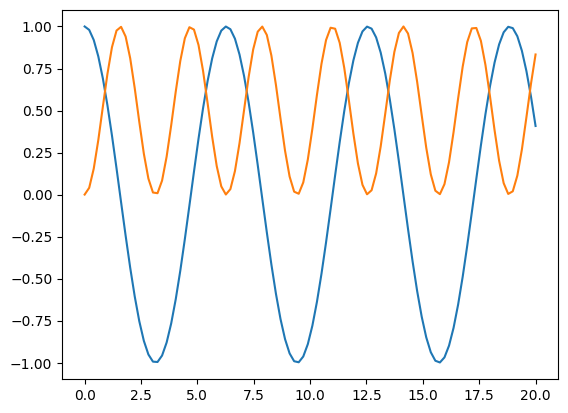

In [ ]:
x = np.linspace(0, 20, 100)

plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x) ** 2)
plt.show()

We can also change the color and style of the plot.

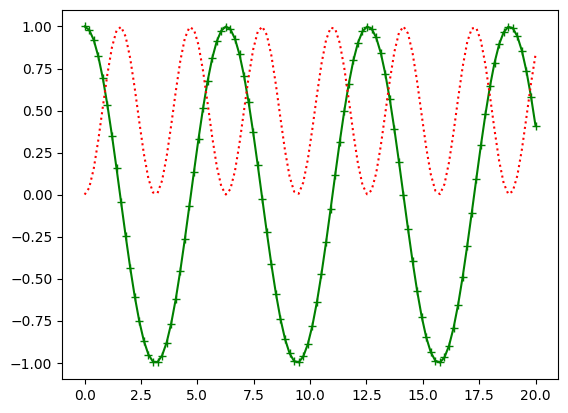

In [ ]:
x = np.linspace(0, 20, 100)

plt.plot(x, np.cos(x), 'g+-')
plt.plot(x, np.sin(x) ** 2, 'r:')
plt.show()

We can create bar plots as well.

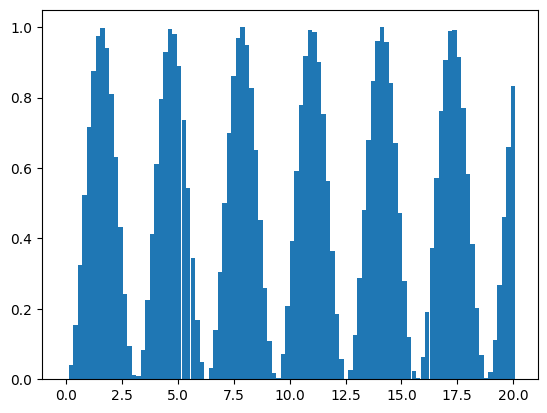

In [ ]:
x = np.linspace(0, 20, 100)
plt.bar(x, np.sin(x)**2, width=0.2)
plt.show()

### Exercise 5 - Plot with a legend

Using the documentation produce a plot with a legend.


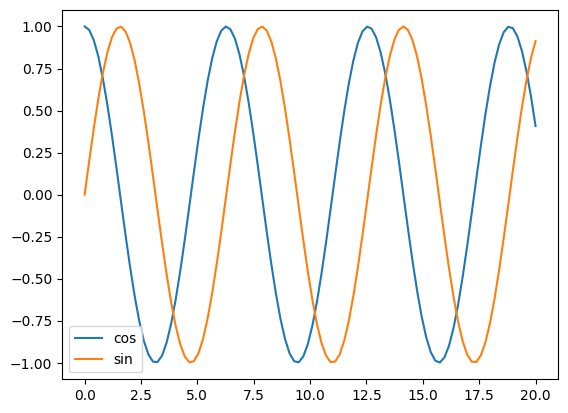

In [ ]:
x = np.linspace(0, 20, 100)

plt.plot(x, np.cos(x), label='cos')
plt.plot(x, np.sin(x), label='sin')
plt.legend()
plt.show()

# OpenCV

OpenCV is an image-manipulation library. We will now use it to load images and display them, but later we will use it for various forms of image processing.

Loading an image is easy in OpenCV. We will load the image that we downloaded through in the introductory part of the exercise. We can see that this image is a NumPy array. With shape `(height, width, 3)`. The last axis represents the three RGB components. So we have three matrices and each of them the intensity of one of the three components. It should be noted that **OpenCV works with the image in BGR channel-order by default!** while many other libraries assume the RGB order.

We will download and later display an image of the Bunchberry plant captured by Thomas G. Barnes released into public domain by USFWS.

In [ ]:
import cv2
!wget https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/plant.jpg
img = cv2.imread('plant.jpg')
print("Image class:", type(img))
print("Image shape:", img.shape)
print("Image data type: ", img.dtype)

--2024-08-20 13:29:34--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/plant.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104311 (102K) [image/jpeg]
Saving to: ‘plant.jpg’

plant.jpg           100%[===================>] 101.87K  --.-KB/s    in 0.003s  

2024-08-20 13:29:34 (37.3 MB/s) - ‘plant.jpg’ saved [104311/104311]

Image class: <class 'numpy.ndarray'>
Image shape: (416, 638, 3)
Image data type:  uint8


Displaying an image in OpenCV is a bit complicated. Since we are in a notebook environment, we need another library for that. Specifically matplotlib as previously shown. When displaying an image, it is necessary to convert the image from BGR to RGB using slicing.


The commented part of the code shows how it is done when running outside the notebook. `cv2.waitKey` stops the program from running for the number of milliseconds in its argument, or as long as the key is pressed. If the argument is 0, it waits for the key indefinitely.

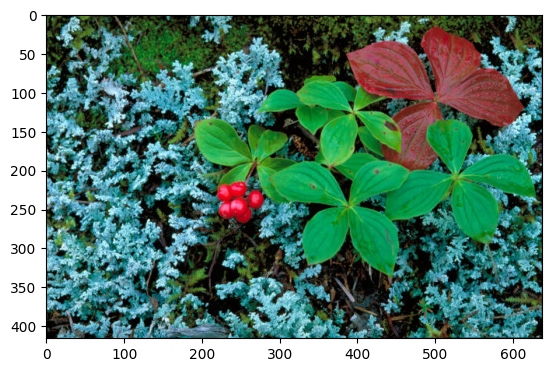

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:,::-1])
plt.show()

# cv2.imshow('Image', img)
# if cv2.waitKey(0) & 0xFF == ord('q'):
#     return

We can also display the individual channels.

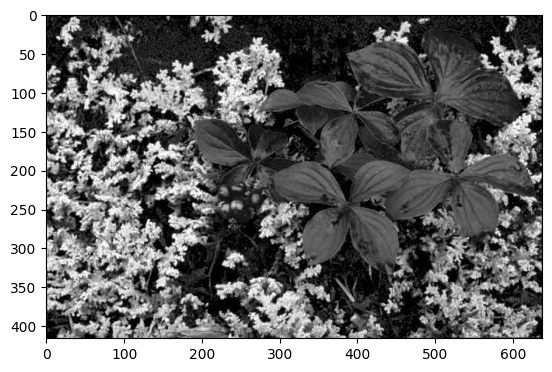

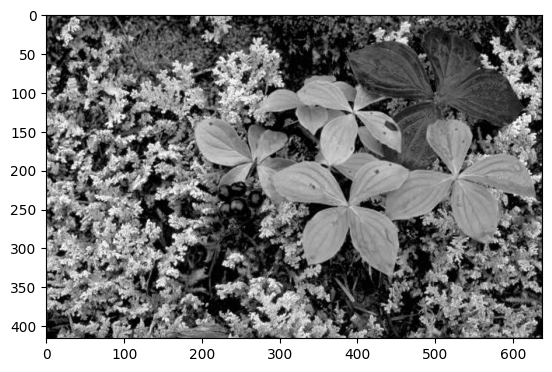

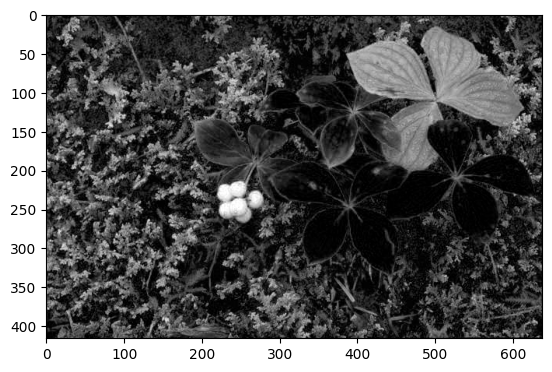

In [ ]:
plt.imshow(img[:,:,0],cmap='gray')
plt.show()
plt.imshow(img[:,:,1],cmap='gray')
plt.show()
plt.imshow(img[:,:,2],cmap='gray')
plt.show()

By default, images are in uint8, i.e. integers from 0 to 255. Sometimes we want to get these values into floats, and then values between 0 and 1 are expected by default.

float64


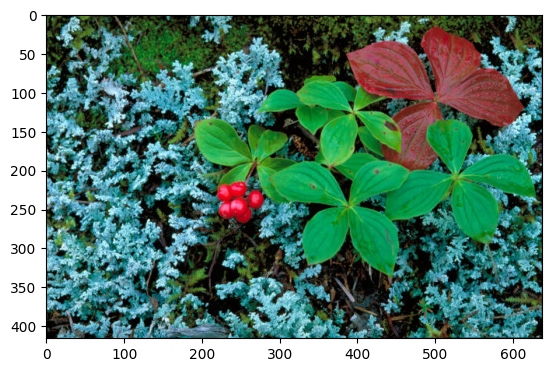

In [ ]:
img_f = img / 255
print(img_f.dtype)
plt.imshow(img[:,:,::-1])
plt.show()

We can perform some basic image manipulations such as changing the values in one of the channels.

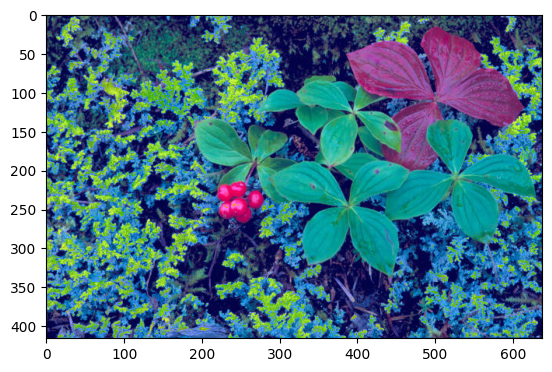

In [ ]:
img[:,:,0] += 50
plt.imshow(img[:,:,::-1])
plt.show()

We will now download an image of northern cardinal captured by Thomas G. Barnes and released into public domain by USFWS and display it.

In [ ]:
!wget 'https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/bird.png'

--2024-08-20 13:36:19--  https://raw.githubusercontent.com/kocurvik/edu/master/PSO/images/bird.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 302114 (295K) [image/png]
Saving to: ‘bird.png’

bird.png            100%[===================>] 295.03K  --.-KB/s    in 0.008s  

2024-08-20 13:36:20 (37.6 MB/s) - ‘bird.png’ saved [302114/302114]



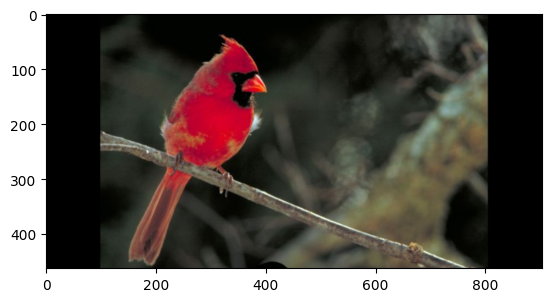

In [ ]:
img_b = cv2.imread('bird.png')
plt.imshow(img_b[:,:,::-1])
plt.show()

We can make the image larger by specifying the scale.

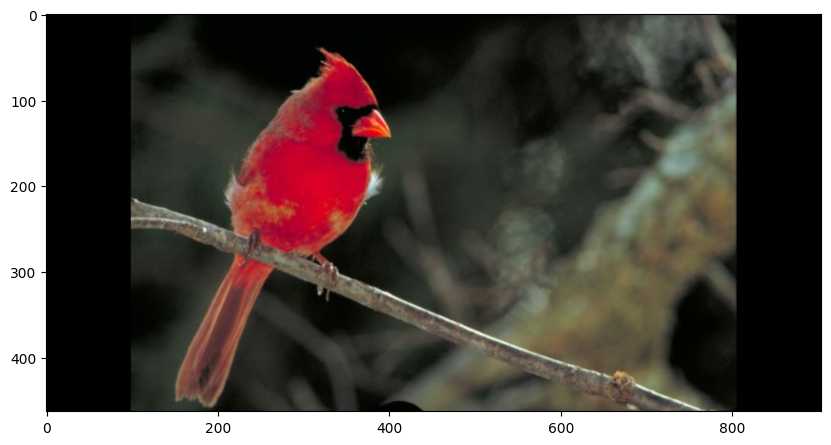

In [ ]:
plt.figure(figsize=[10, 10])

img_b = cv2.imread('bird.png')
plt.imshow(img_b[:,:,::-1])
plt.show()

We can also remove the useless markers.

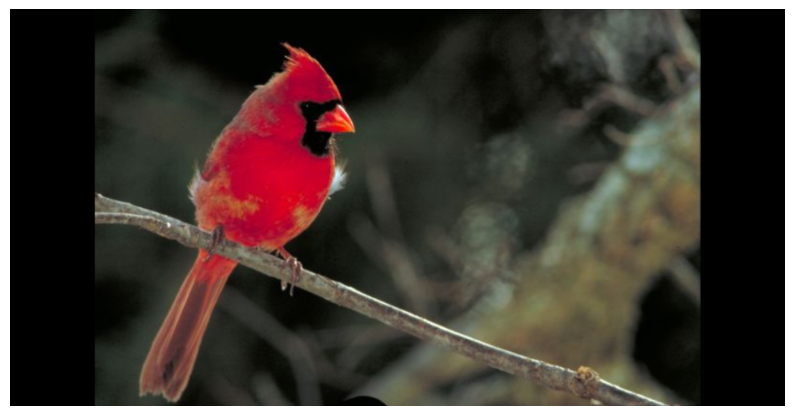

In [ ]:
plt.figure(figsize=[10, 10])

img_b = cv2.imread('bird.png')
plt.imshow(img_b[:,:,::-1])
plt.axis('off')
plt.show()

### Exercise 6 - Image Crop

Using NumPy manipulations crop and display the head of the bird.

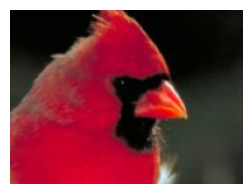

In [ ]:
plt.figure(figsize=[3, 3])

img_b = cv2.imread('bird.png')
plt.imshow(img_b[50:200,250:450,::-1])
plt.axis('off')
plt.show()

### Exercise 7 - Plot with star

Add a star (or other matplotlib marker) to the plot.

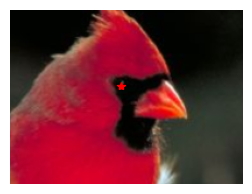

In [ ]:
plt.figure(figsize=[3, 3])

img_b = cv2.imread('bird.png')
plt.imshow(img_b[50:200,250:450,::-1])
plt.plot([95], [65], 'r*')
plt.axis('off')
plt.show()